In [ ]:
# affiche tous les résultats d'une cellule, et pas uniquement le dernier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# TP : Prise en main de NetworkX

[NetworkX](https://networkx.org/) est une bibliothèque Python dédiée à l'études des graphes et des réseaux. La documentation officielle est disponible [ici](https://networkx.org/documentation/stable/tutorial.html).

💡 si NetworkX n'est pas présent sur votre machine, vous pouvez l'installer avec la commande `pip install networkx`.
 
 ## Premiers pas avec NetworkX
 ### Créer un graphe

Il existe plusieurs méthodes pour créer un graphe. La plus simple est de créer un graphe vide :

In [ ]:
import networkx as nx
import numpy as np
G = nx.Graph() # ou Digraph() pour un graphe orienté

On peut aussi fournir au constructeur une liste d'arêtes / arcs :

In [ ]:
edgelist = [(0, 1), (1, 2), (2, 3)]
G = nx.Graph(edgelist)

Il peut être plus pratique de fournir une matrice :

In [ ]:
adjacency_matrix = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 0, 0]])
adjacency_matrix
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()

array([[0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 0]])

EdgeView([(0, 1), (0, 2), (0, 3), (1, 3)])

NetworkX dispose aussi de nombreux graphes "prêts à l'emploi" ou [générateurs](https://networkx.org/documentation/stable/reference/generators.html) :

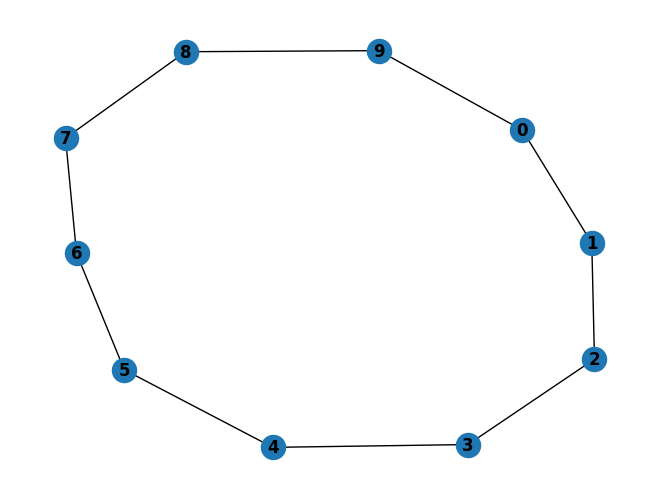

In [ ]:
G = nx.cycle_graph(10)
nx.draw(G, with_labels=True, font_weight='bold')

Enfin, on peut aussi créer un graphe à partir d'un autre graphe en utilisant l'une des deux méthodes suivantes :

In [ ]:
H = nx.Graph(G)
H = G.copy()

Il est bien sûr possible de construire un graphe à partir d'un fichier, qui contient par exemple les listes d'adjacences des sommets :
```
fichier adjacency_list.dat

0 1 2 3 
1 3 5
3 4
```

In [ ]:
G = nx.read_adjlist('adjacency_list.dat', nodetype=int)

### Afficher un graphe

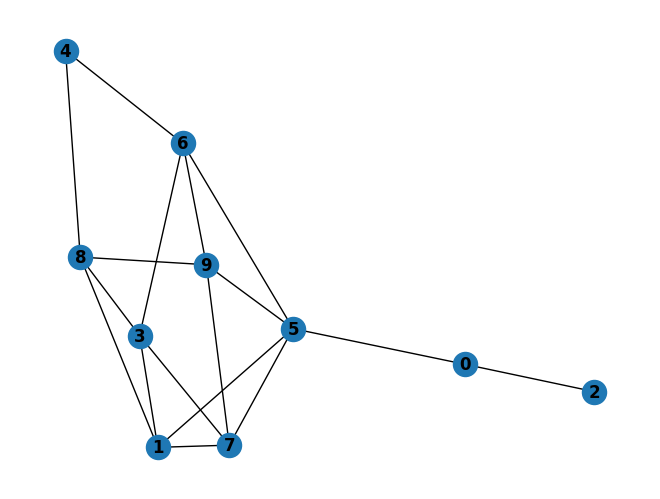

In [ ]:
G = nx.gnp_random_graph(10, 0.4)
nx.draw(G, with_labels=True, font_weight='bold')

Par défaut, la position des sommets est aléatoire et change à chaque exécution. Si on demande de dessiner le même graphe une seconde fois, le résultat sera différent :

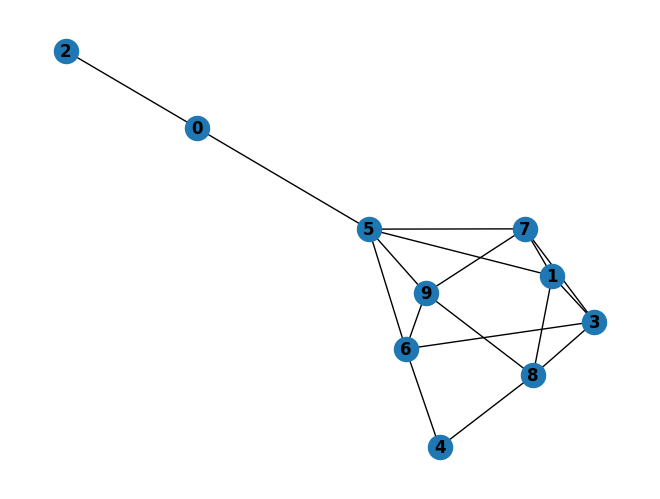

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')

Il est cependant possible de spécifier explicitement les positions des noeuds, grâce aux fonctions `*_layout`. Par exemple, la fonction `random_layout` renvoie les positions aléatoires des noeuds, qu'on peut stocker pour redessiner exactement le même graphe :

{0: array([0.18693787, 0.7452844 ], dtype=float32),
 1: array([0.33305126, 0.996781  ], dtype=float32),
 2: array([0.82358557, 0.14993766], dtype=float32),
 3: array([0.36525178, 0.43173984], dtype=float32),
 4: array([0.44913653, 0.80463135], dtype=float32),
 5: array([0.4943681 , 0.83330077], dtype=float32),
 6: array([0.69096047, 0.977246  ], dtype=float32),
 7: array([0.7707858 , 0.96645564], dtype=float32),
 8: array([0.87469876, 0.89735276], dtype=float32),
 9: array([0.8784858 , 0.99180883], dtype=float32)}

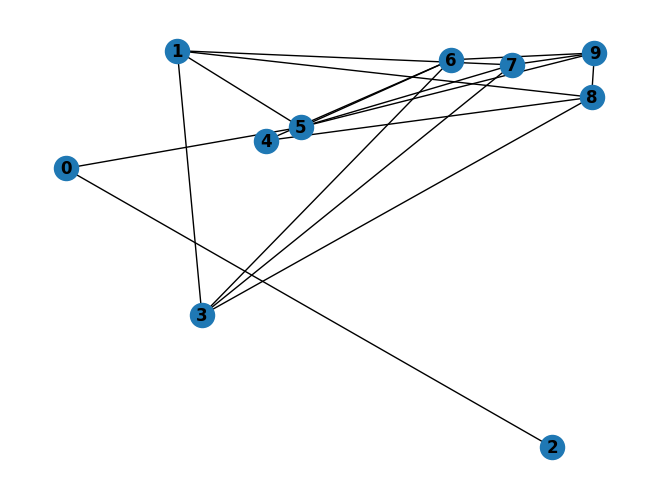

In [ ]:
pos = nx.random_layout(G)
pos
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

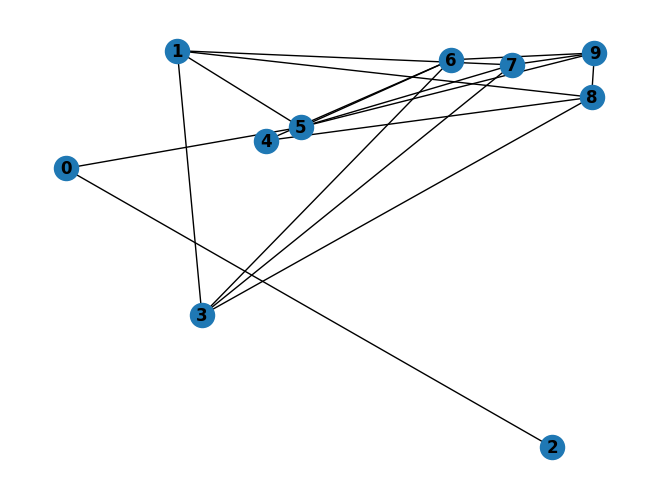

In [ ]:
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

NetworkX dispose de plusieurs dispositions (ou *layouts*) prédéfinies. On peut par exemple demander une disposition des sommets circulaire :

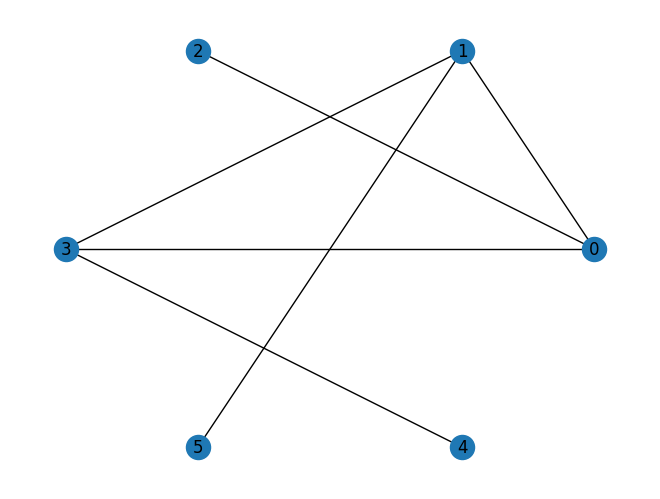

In [ ]:
nx.draw_circular(G, with_labels=True)

Les possibilités sont infinies !

[0, 0, 0, 0, 0, 0, 0]

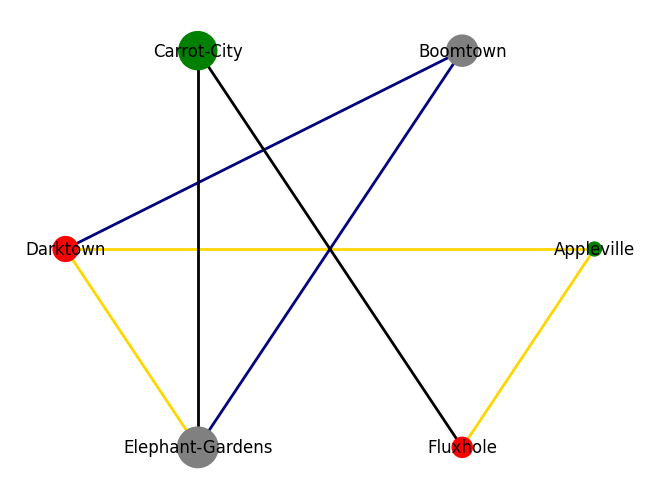

In [ ]:
G = nx.MultiGraph()
G.add_nodes_from([('A', {'pop':1000, 'lifeq':'+'}), ('B', {'pop':5000, 'lifeq':'o'}),\
                  ('C', {'pop': 7500, 'lifeq':'+'}), ('D', {'pop': 3200, 'lifeq':'-'}),\
                 ('E', {'pop': 8500, 'lifeq':'o'}), ('F', {'pop':2100, 'lifeq':'-'})])

G.add_edges_from([ ('A', 'D', {'speed':'fast'}),
                   ('E', 'D', {'speed':'fast'}),
                   ('F', 'C', {'speed':'slow'}),
                  ('E', 'C', {'speed':'slow'}),
                 ('B', 'D', {'speed':'medium'}),
                 ('E', 'B', {'speed':'medium'}),
                 ('A', 'F', {'speed':'fast'})])

names = {'A': 'Appleville', 'B':'Boomtown', 'C':'Carrot-City', 'D':'Darktown', 'E':'Elephant-Gardens', 'F':'Fluxhole'}

# node size
population = [nx.get_node_attributes(G, 'pop')[node]/10. for node in G]

# node color
color_of_quality = {'+': 'green', '-':'red', 'o':'grey'}
quality_colors = [color_of_quality[nx.get_node_attributes(G, 'lifeq')[node]] for node in G]

# edge color
color_of_transport={'slow':'black', 'medium':'navy', 'fast':'gold'}
transport_colors = [color_of_transport[prop['speed']] for u, v, prop in G.edges(data=True)]

nx.draw_circular(G, \
                 node_size=population, \
                 node_color=quality_colors, \
                 edge_color=transport_colors, \
                 width=2, \
                 with_labels=True, \
                 labels=names)

💡 Il est fortement conseillé de visiter le site de la principale bibliothèque Python de visualisation de données, [Matplotlib](https://matplotlib.org/).

### Ajouter des sommets ou des arêtes / arcs

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2)])

💡 NetworkX se contente d'ignorer les sommets ou arêtes / arcs qui seraient éventuellement déjà présents dans le graphe.

💡 Les identifiants de sommets ne sont pas limités à des nombres : NetworkX accepte n'importe quelle donnée *hachable* (c'est-à-dire à partir de laquelle on peut calculer un identifiant), comme une chaîne de caractère, une image, un fichier XML... :

In [ ]:
G = nx.Graph()
G.add_node("sommet 1")    # ajoute le sommet "sommet 1"
G.add_nodes_from("abcdef")  # adds 6 sommets: 'a', 'b', 'c', 'd', 'e', 'f'
G.add_edge(0, 'z')

### Supprimer des sommets ou des arêtes / arcs

In [ ]:
G.remove_node('c')
G.remove_nodes_from("abcd")
G.remove_edge(0, 'z')

### Obtenir des renseignements sur un graphe
NetworkX dispose de nombreuses fonctions permettant d'obtenir des renseignements sur un graphe, notamment :
-   `g.degree()`  : degrés des sommets du graphe g
-   `g.number_of_nodes()`  : nombre de sommets du graphe g
-   `g.number_of_edges()`  : nombre d’arcs du graphe g
-   `g.predecessors(i)`  : liste des prédécesseurs du sommet i
-   `g.successors(i)`  : liste des successeurs du sommet i
-   `g.neighbors(i)`  : liste des voisins du sommet i

⚠️ Pour un graphe orienté, `DiGraph.neighbors` est un synonyme de `DiGraph.successors`.

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2)])
G.number_of_nodes()
G.number_of_edges()
list(G.nodes)
list(G.edges)
G.degree[1]
list(G.successors(1))
list(G.predecessors(1))
list(G.neighbors(1)) # ou list(G.adj[1])

5

6

[0, 1, 2, 3, 4]

[(0, 1), (1, 3), (1, 2), (3, 4), (4, 2), (4, 0)]

3

[3, 2]

[0]

[3, 2]

### Matrices
NetworkX permet d'obtenir directement la matrice d'incidence ou d'adjacence d'un graphe :

In [ ]:
nx.incidence_matrix(G).todense()
nx.adjacency_matrix(G).todense()

array([[1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1.]])

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0]])

Il sera parfois plus commode de manipuler une autre représentation, basée sur des dictionnaires (ce qui correspond plus ou moins à une liste d'adjacence) :

In [ ]:
nx.to_dict_of_dicts(G)

{0: {1: {}}, 1: {3: {}, 2: {}}, 2: {}, 3: {4: {}}, 4: {2: {}, 0: {}}}

## Exercice

Dans la suite, vous aurez besoin des packages `networkx`, `matplotlib` et `scipy`. Installez-les à l'aide de la commande `pip install *package*` (dans un terminal) si vous ne les avez pas sur votre machine.

In [ ]:
import networkx as nx

Q1 : Créez le graphe de Petersen en donnant explicitement la liste de ses arêtes

In [ ]:
# Créer un nouveau graphe non-dirigé
G = nx.Graph()

# Ajouter les nœuds du graphe de Petersen
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Ajouter les arêtes du graphe de Petersen
G.add_edges_from([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)])


Q2 : Affichez le graphe créé, en indiquant les numéros de sommets en gras

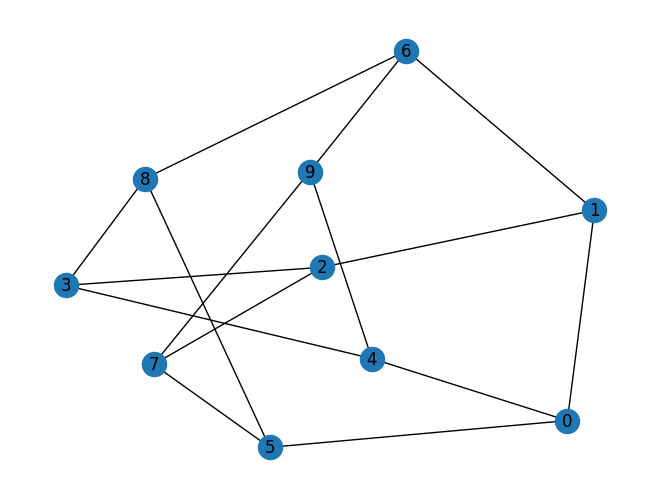

In [ ]:
# Afficher le graphe
nx.draw(G, with_labels=True)

Par défaut, les sommets sont disposés de manière aléatoire, ce qui ne facilite pas la lecture des graphes ayant une structure régulière, comme le graphe de Petersen. Cherchez dans la documentation de NetworkX une autre fonction permettant d'afficher ce graphe sous une forme plus "classique".

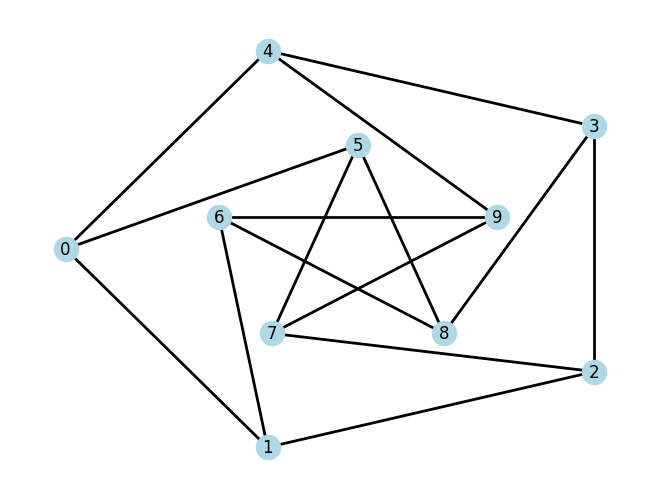

In [ ]:
# Afficher le graphe
pos = nx.shell_layout(G, nlist=[range(5,10), range(5)])
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', width=2)

**Pour les questions qui suivent, donnez la réponse en utilisant les fonctions de NetworkX**

Ce graphe est-il orienté ou non orienté ?

In [ ]:
# Vérifier si le graphe est orienté
if isinstance(G, nx.DiGraph):
    print("Le graphe est orienté.")
else:
    print("Le graphe est non orienté.")

Le graphe est non orienté.


Quels sont ses sommets et ses arêtes ?

In [ ]:
# Obtenir les sommets du graphe G
sommet = list(G.nodes())
print("Les sommets de G sont :", sommet)

# Obtenir les arêtes du graphe G
aretes = list(G.edges())
print("Les arêtes de G sont :", aretes)


Les sommets de G sont : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Les arêtes de G sont : [(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


Quels sont les voisins du sommet 2 ? Quel est le degré du sommet 10 ?

In [ ]:
# Obtenir les voisins du sommet 2
voisins_de_2 = list(G.neighbors(2))
print("Les voisins du sommet 2 sont :", voisins_de_2)

# Obtenir le degré du sommet 10
degre_de_10 = G.degree[9] # j'ai indenté à partir de 0...
print("Le degré du sommet 10 est :", degre_de_10)


Les voisins du sommet 2 sont : [1, 3, 7]
Le degré du sommet 10 est : 3


Ce graphe est-il régulier ?

In [ ]:
# Savoir si G est régulier
if nx.is_regular(G):
    print("Le graphe est régulier.")
else:
    print("Le graphe est non régulier.")

Le graphe est régulier.


Ce graphe est-il connexe ?

In [ ]:
# Vérifier si le graphe G est connexe
if nx.is_connected(G):
    print("Le graphe G est connexe.")
else:
    print("Le graphe G n'est pas connexe.")

Le graphe G est connexe.


Donnez sa matrice d’incidence et sa matrice d’adjacence

In [ ]:
# Obtenir la matrice d'incidence de G
matrice_incidence = nx.incidence_matrix(G, nodelist=sorted(G.nodes()))
print("La matrice d'incidence de G est :")
print(np.matrix(matrice_incidence))

# Obtenir la matrice d'adjacence de G
matrice_adjacence = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))
print("La matrice d'adjacence de G est :")
print(np.matrix(matrice_adjacence))

La matrice d'incidence de G est :
[[<10x15 sparse array of type '<class 'numpy.float64'>'
  	with 30 stored elements in Compressed Sparse Column format>]]
La matrice d'adjacence de G est :
[[<10x10 sparse array of type '<class 'numpy.int64'>'
  	with 30 stored elements in Compressed Sparse Row format>]]


Quel est le sous-graphe induit par les sommets {6, 3, 7, 8, 1, 5} ?

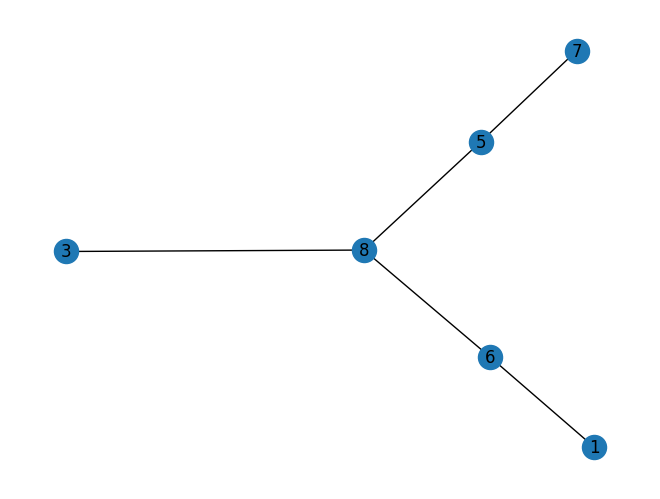

In [ ]:
# Obtenir le sous-graphe induit par {6, 3, 7, 8, 1, 5}
sous_graphe = G.subgraph([6, 3, 7, 8, 1, 5])

# Afficher le sous-graphe
nx.draw_spring(sous_graphe, with_labels=True)

Mettez en évidence (avec des arêtes rouges) un chemin hamiltonien (calculé à la main) sur le graphe de Petersen

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 9), (9, 6), (6, 8), (8, 5), (5, 7)]


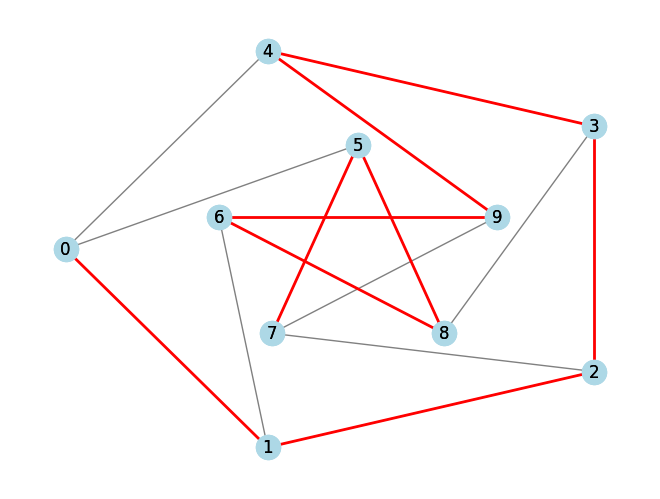

In [ ]:
# fixer une position (pour le dessin)
position = nx.shell_layout(G, nlist=[range(5,10), range(5)])

# Dessiner le graphe avec les arêtes colorées en gris léger
nx.draw(G, pos=position, with_labels=True, node_color='lightblue', edge_color='grey', width=1)

# Définir le chemin hamiltonien à mettre en évidence
chemin_hamiltonien = [0, 1, 2, 3, 4, 9, 6, 8, 5, 7]

aretes_hami = []
# Définir les arêtes entre chaque paire de sommets adjacents précédents à colorer en rouge
for i in range(len(chemin_hamiltonien)-1):
    aretes_hami.append((chemin_hamiltonien[i], chemin_hamiltonien[i+1]))


print(aretes_hami)

# Dessiner le graphe avec les arêtes colorées
nx.draw(G, pos=position, with_labels=True, node_color='lightblue', edgelist=aretes_hami, edge_color='red', width=2)

Quelle est la taille d'un transversal minimum ? D'un couplage maximum ? D'un stable maximum ? D'une coloration minimum ?

In [ ]:
# Calculer la taille d'une couverture d'arêtes minimum
couverture_minimum = nx.min_edge_cover(G)
taille_couverture_minimum = len(couverture_minimum)
print("La taille d'une couverture d'arêtes minimum est :", taille_couverture_minimum)

# Calculer la taille d'un couplage maximum
couplage_maximum = nx.max_weight_matching(G, weight='weight')
taille_couplage_maximum = len(couplage_maximum)
print("La taille d'un couplage maximum est :", taille_couplage_maximum)

# Calculer la taille d'un ensemble indépendant maximum
ensemble_independant_maximum = nx.maximal_independent_set(G)
taille_ensemble_independant_maximum = len(ensemble_independant_maximum)
print("La taille d'un ensemble indépendant maximum est :", taille_ensemble_independant_maximum)

# Calculer la taille d'une coloration minimum
coloration_minimum = nx.greedy_color(G, strategy='DSATUR')
taille_coloration_minimum = max(coloration_minimum.values()) + 1
print("La taille d'une coloration minimum est :", taille_coloration_minimum)

La taille d'une couverture d'arêtes minimum est : 5
La taille d'un couplage maximum est : 5
La taille d'un ensemble indépendant maximum est : 4
La taille d'une coloration minimum est : 3
